In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_data = pd.read_csv('/Users/lirving/loan-prediction/datasets/loan_train.csv')
test_data = pd.read_csv('/Users/lirving/loan-prediction/datasets/loan_test.csv')


loan_status_train = train_data['Loan_Status'] #Store target variable

df = pd.concat([train_data.drop(['Loan_Status'], axis=1), test_data]) #Concatenate training and test sets

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [13]:
df.drop('Loan_ID', inplace=True,axis=1)

In [14]:
#Change categorical data from 'object' type to 'category' type

df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')

In [15]:
# Count NA values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [16]:
#Impute missing values

df['Gender'].fillna(method='ffill', inplace=True)
df['Married'].fillna(method='ffill', inplace=True)
df['Dependents'].fillna('0', inplace=True)
df['Self_Employed'].fillna(method='ffill', inplace=True)
df['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(method='ffill', inplace=True)

In [17]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Visualizations

### Numerical Variables vs. Loan_Status

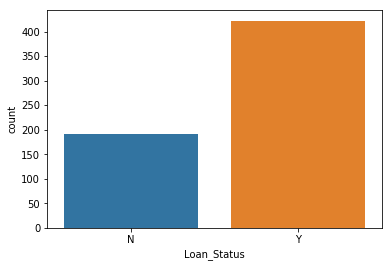

In [322]:
sns.countplot(train_data['Loan_Status']);

As can be seen in the diagram above, most loans are accepted.

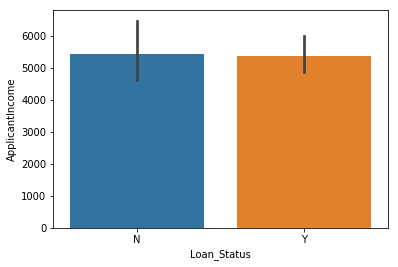

In [323]:
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=train_data);

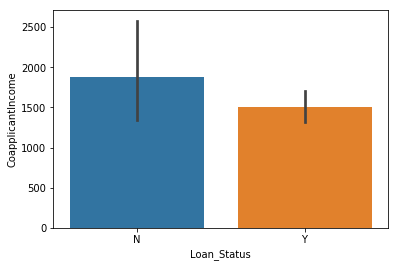

In [324]:
sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=train_data);

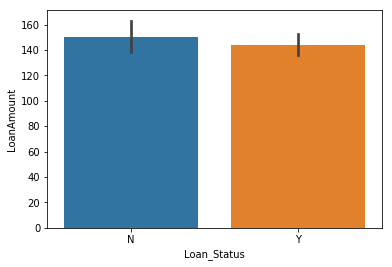

In [325]:
sns.barplot(x='Loan_Status', y='LoanAmount', data=train_data);

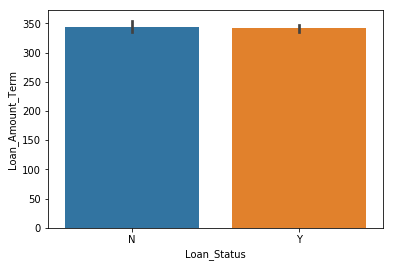

In [326]:
sns.barplot(x='Loan_Status', y='Loan_Amount_Term', data=train_data);

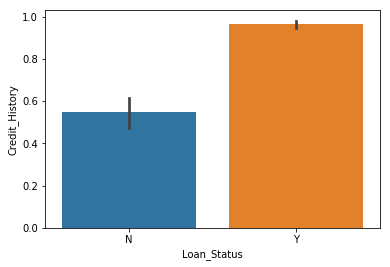

In [327]:
sns.barplot(x='Loan_Status', y='Credit_History', data=train_data);

Probility of getting loan for each Credit History class: 
                 Loan_Status
Credit_History             
0.0                0.138614
1.0                0.795322


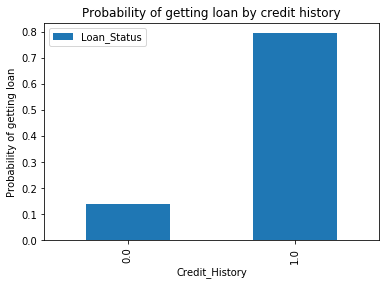

In [328]:
status_history = train_data.pivot_table(values='Loan_Status',index=['Credit_History'],
                                        aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Probility of getting loan for each Credit History class: \n', status_history)

ax= status_history.plot(kind='bar', title='Probability of getting loan by credit history')
ax.set_ylabel('Probability of getting loan');

Of the numeric variables, *CoapplicantIncome* and *Credit_History* seem to be the only ones correlated with *Loan_Status*.

### Categorical Variables vs. Loan_Status

Gender       Female  Male
Loan_Status              
N                37   155
Y                77   345


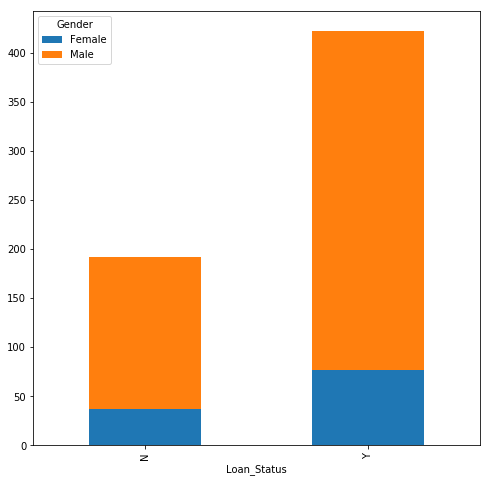

In [329]:
status_gender_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Gender"])

print(status_gender_table)
status_gender_table.plot(kind="bar", figsize=(8,8),stacked=True);

Married       No  Yes
Loan_Status          
N             79  113
Y            135  287


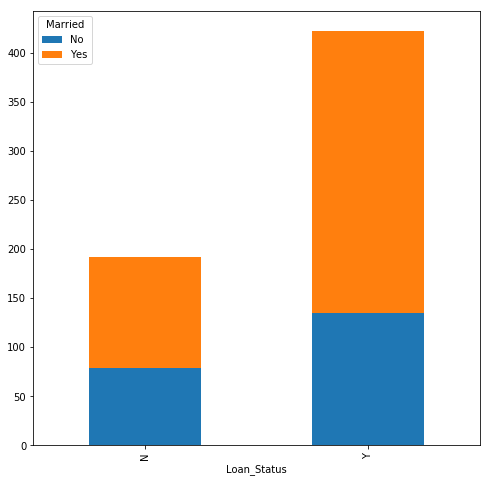

In [330]:
status_married_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Married"])

print(status_married_table)
status_married_table.plot(kind="bar", figsize=(8,8),stacked=True);


Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


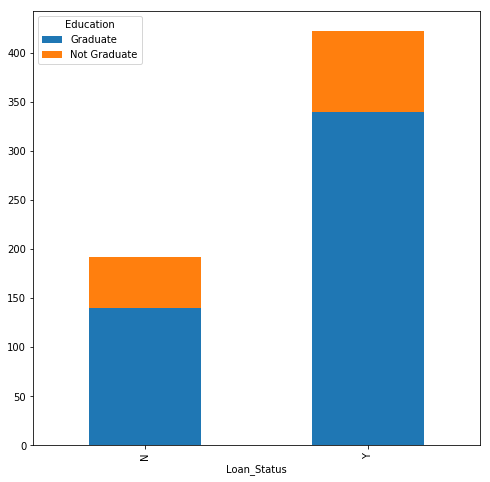

In [331]:
status_education_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Education"])

print(status_education_table)
status_education_table.plot(kind="bar", figsize=(8,8),stacked=True);

Dependents     0   1   2  3+
Loan_Status                 
N            113  36  25  18
Y            247  66  76  33


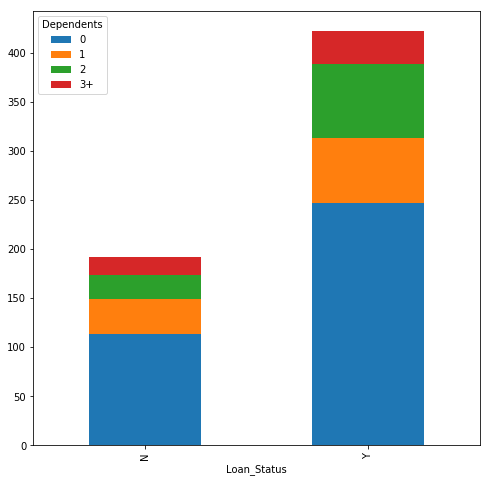

In [332]:
status_dependents_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Dependents"])

print(status_dependents_table)
status_dependents_table.plot(kind="bar", figsize=(8,8),stacked=True);

Self_Employed   No  Yes
Loan_Status            
N              166   26
Y              362   60


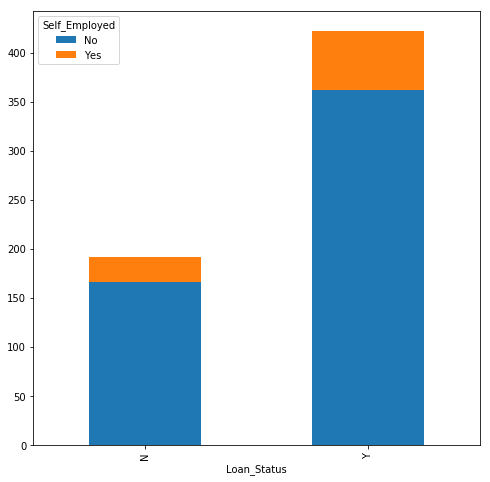

In [333]:
status_semployed_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Self_Employed"])

print(status_semployed_table)
status_semployed_table.plot(kind="bar", figsize=(8,8),stacked=True);

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


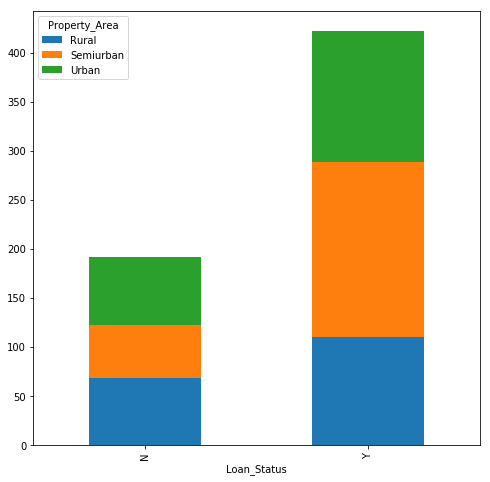

In [334]:
status_property_table = pd.crosstab(index=train_data["Loan_Status"], 
                          columns=train_data["Property_Area"])

print(status_property_table)
status_property_table.plot(kind="bar", figsize=(8,8),stacked=True);

Of the categorical variables, *Married, Education, Dependents & Property Area* are correlated with *Loan_Status*.

## Classifiers

In [19]:
#Convert categorical variables to numeric

from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]) 


In [20]:
df_train = df.iloc[:614]
df_test = df.iloc[614:]

X_train = df_train.values
X_test = df_test.values
y_train = loan_status_train

### Decision Tree

Decision Tree Classifier with all variables included.

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [26]:
test_data['Loan_Status'] = preds

(367,)

Accuracy score for this model is: 0.674